[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AxelSkrauba/Taller_Signals/blob/main/2_Frecuencia/Procesar_csv_Osciloscopio.ipynb)

# Procesamiento de archivos CSV del Osciloscopio

## Ejemplo sencillo sobre un ejemplo

In [1]:
# Archivos pueden arrastrarse al área de trabajo o procesarse en local

# Version Online
!wget https://github.com/AxelSkrauba/Taller_Signals/raw/main/2_Frecuencia/Osciloscopio_ejemplo.zip

# Hay varias capturas. La imagen y el CSV asociado. De distintos tipos de señales y osciloscopios.

--2023-08-30 21:19:14--  https://github.com/AxelSkrauba/Taller_Signals/raw/main/2_Frecuencia/Osciloscopio_ejemplo.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AxelSkrauba/Taller_Signals/main/2_Frecuencia/Osciloscopio_ejemplo.zip [following]
--2023-08-30 21:19:14--  https://raw.githubusercontent.com/AxelSkrauba/Taller_Signals/main/2_Frecuencia/Osciloscopio_ejemplo.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272183 (266K) [application/zip]
Saving to: ‘Osciloscopio_ejemplo.zip’

Osciloscopio_ejempl 100%[===================>] 265.80K  --.-KB/s    in 0.04s   

2023-08-30 21:19:15 (7.06

In [2]:
!unzip -qq Osciloscopio_ejemplo.zip

### Información básica

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lectura del csv
archivo = pd.read_csv("DS0024.CSV")   # Ejemplo de una senoidal modulada

In [33]:
# Para visualizar un fragmento de los datos
archivo.head(5)

,t1,CH1,Unnamed: 2
0,-0.05000,-0.128,NaN
1,-0.04999,-0.184,NaN
2,-0.04998,-0.232,NaN
3,-0.04997,-0.232,NaN
4,-0.04996,-0.176,NaN


In [34]:
# Para visualizar tipos de datos, cantidades, etc.
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   t1          10000 non-null  float64
 1   CH1         10000 non-null  float64
 2   Unnamed: 2  0 non-null      float64
dtypes: float64(3)
memory usage: 234.5 KB


In [35]:
archivo.describe()
# Genera los descriptores estadísticos básicos

,t1,CH1,Unnamed: 2
count,10000.000000,10000.000000,0.0
mean,-0.000005,-0.003615,NaN
std,0.028869,0.441972,NaN
min,-0.050000,-0.720000,NaN
25%,-0.025003,-0.440000,NaN
50%,-0.000005,0.000000,NaN
75%,0.024993,0.424000,NaN
max,0.049990,0.720000,NaN


### Obteniendo vectores

In [36]:
d1 = archivo["CH1"]
t1 = archivo["t1"]

In [37]:
type(d1)    # Es un vector del tipo Serie de Pandas, se puede convertir a array de Numpy para procesar como antes...

pandas.core.series.Series

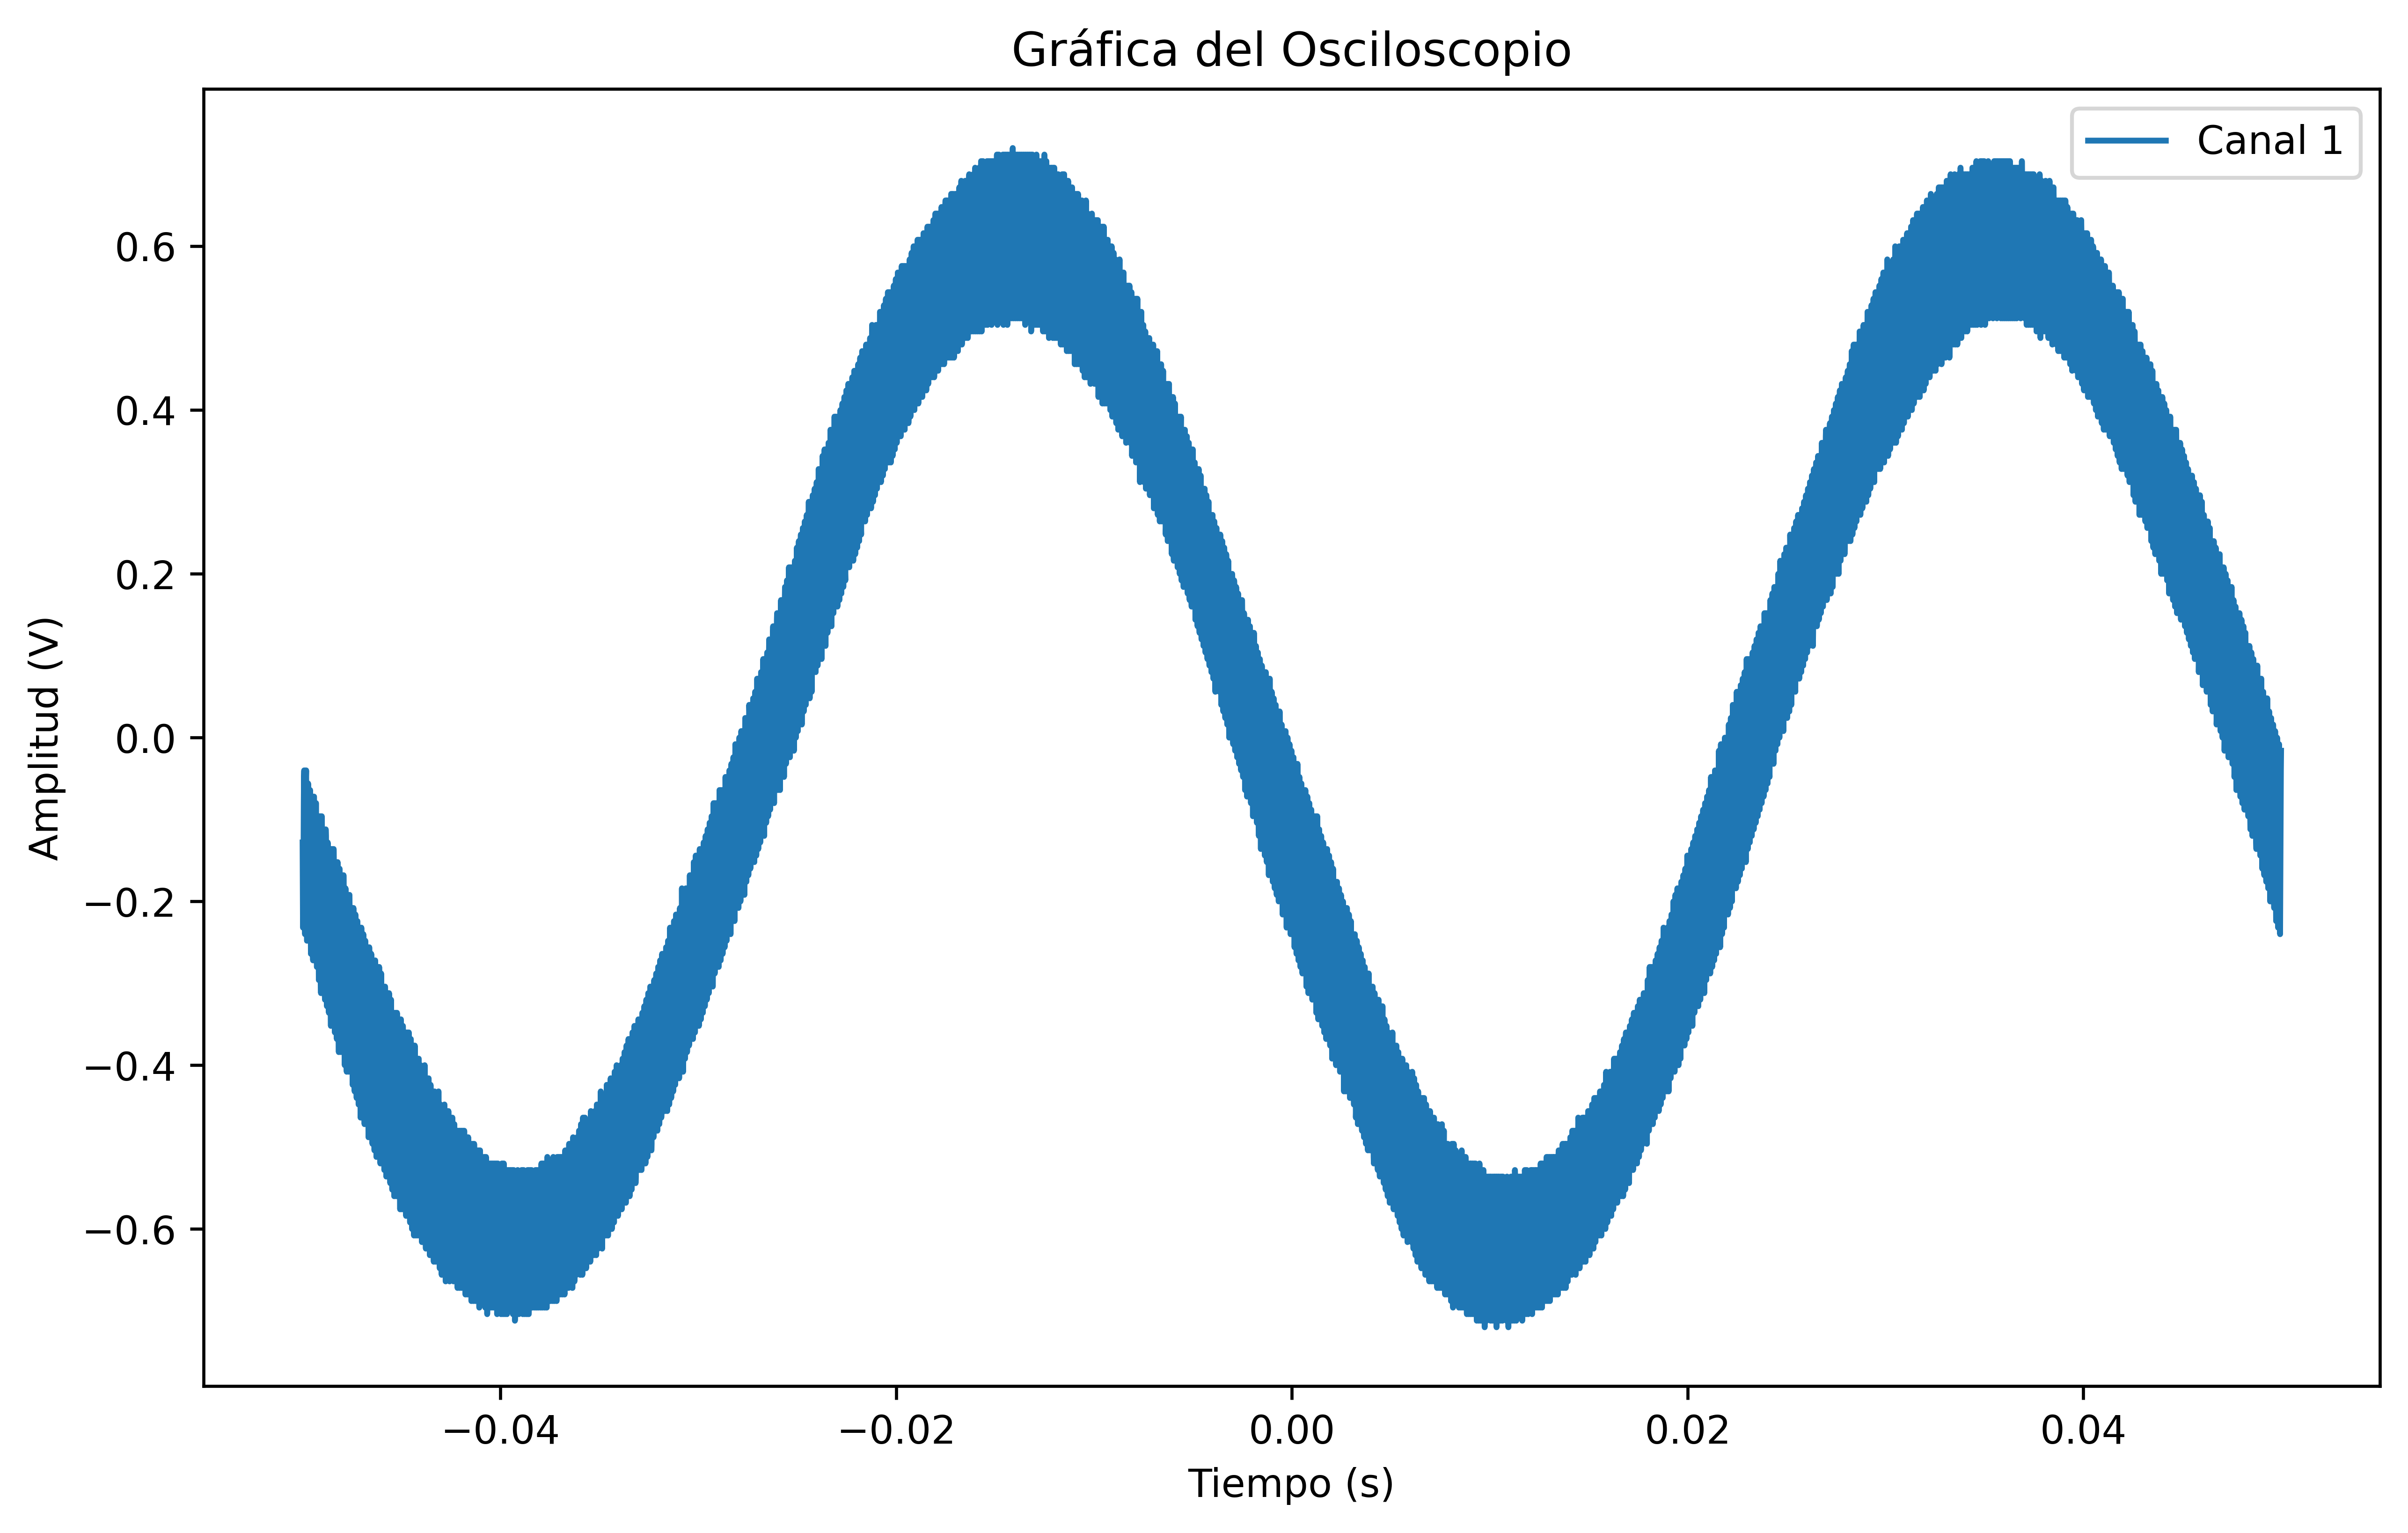

In [39]:
plt.figure(figsize=(10,6), dpi=600)
plt.plot(t1, d1)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Gráfica del Osciloscopio")
plt.legend(("Canal 1",))
plt.show()

Hay bastante ruido de "alta frecuencia"

### Procesando datos

In [40]:
from scipy.fft import fft, fftfreq

In [41]:
ch1 = np.array(d1)    # Array de numpy

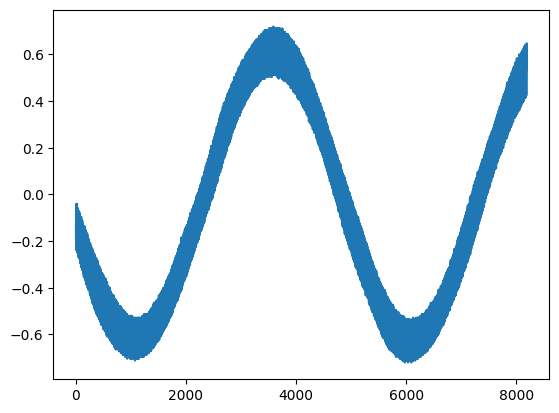

In [57]:
plt.plot(ch1[:8192])  # Primeros 2048 puntos, esto es lo que entra abajo para la FFT

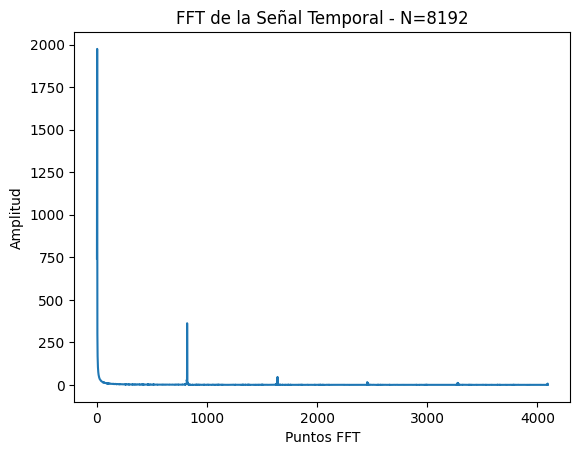

4096


In [58]:
N = 8192        # Puntos para la FFT
OFFSET = 0      # Para filtrar muy bajas frecuencias, en este caso quiero ver todo

signal_fft = fft(ch1, n=N)     # Se calcula la FFT

plt.plot(abs(signal_fft[OFFSET:len(signal_fft)//2]))
plt.xlabel("Puntos FFT")
plt.ylabel("Amplitud")
plt.title("FFT de la Señal Temporal - N={}".format(N))
plt.show()


print(len(signal_fft)//2)

In [59]:
ts = t1[2] - t1[1]    # Para obtener la frecuencia de muestreo, puedo restar el tiempo entre 2 muestras consecutivas cualquiera

In [60]:
fs = int(1/ts)
fs    # 100 kHz para este ejemplo

99999

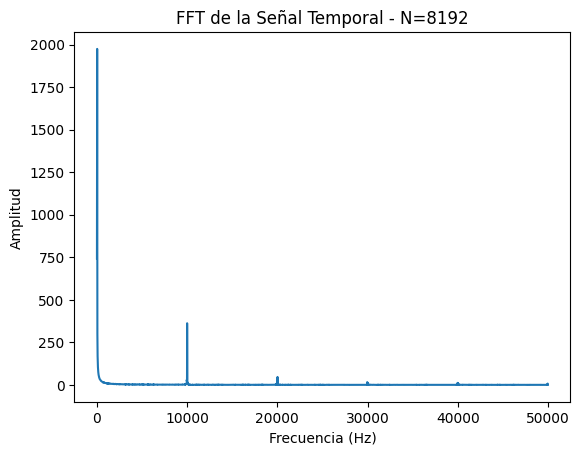

In [61]:
xf = fftfreq(N, 1/fs)           # Vector de frecuencias, para los bins de la FFT de N puntos calculada

plt.plot(xf[OFFSET:len(xf)//2], abs(signal_fft[OFFSET:len(signal_fft)//2]))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("FFT de la Señal Temporal - N={}".format(N))
plt.show()

Se perciben picos en frecuencias puntuales.
Cerca de 0 Hz, no se sabe muy bien dónde está la potencia. Hacemos zoom abajo...

En 10 kHz, 20 kHz, 30... hay armónicos. Corresponden justamente a la frecuencia de conmutación de la electrónica encargada de la modulación.

In [62]:
fft_cut = abs(signal_fft[OFFSET:len(signal_fft)//2])
fft_f_cut = xf[OFFSET:len(xf)//2]

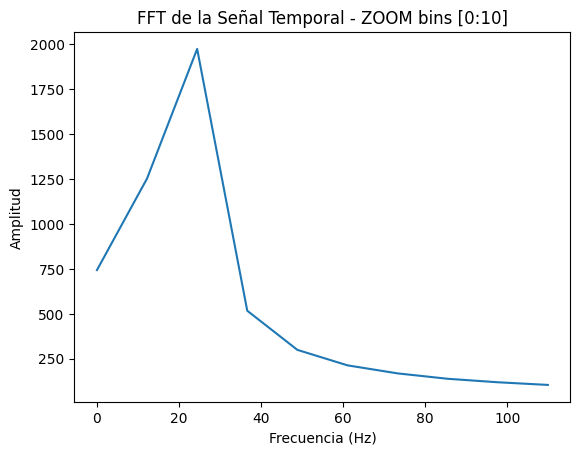

In [67]:
inicio = 0
fin = 10
plt.plot(fft_f_cut[inicio:fin], fft_cut[inicio:fin])
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("FFT de la Señal Temporal - ZOOM bins [{}:{}]".format(inicio, fin))
plt.show()

La mayor potencia está a 20 Hz, que es la frecuencia de la senoidal.

# Filtros

In [69]:
import numpy as np
from scipy import signal

def filtro_pasa_bajos(datos, frecuencia_corte, frecuencia_muestreo, orden=10):
    """
    Aplica un filtro pasa bajos a una señal utilizando SciPy.

    Esta función aplica un filtro pasa bajos a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_corte : float
        La frecuencia de corte del filtro en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    orden : int
        El orden del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro pasa bajos.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro pasa bajos con frecuencia de corte de 100 Hz y orden 4 a la señal original
    frecuencia_corte = 100  # Frecuencia de corte en Hz
    orden = 4
    signal_filtrada = filtro_pasa_bajos(señal_original, frecuencia_corte, frecuencia_muestreo, orden)
    """
    nyquist_frecuencia = 0.5 * frecuencia_muestreo
    normal_frecuencia_corte = frecuencia_corte / nyquist_frecuencia
    b, a = signal.butter(orden, normal_frecuencia_corte, btype='low', analog=False)
    signal_filtrada = signal.lfilter(b, a, datos)
    return signal_filtrada


def filtro_pasa_altos(datos, frecuencia_corte, frecuencia_muestreo, orden=10):
    """
    Aplica un filtro pasa altos a una señal utilizando SciPy.

    Esta función aplica un filtro pasa altos a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_corte : float
        La frecuencia de corte del filtro en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    orden : int
        El orden del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro pasa altos.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro pasa altos con frecuencia de corte de 80 Hz y orden 4 a la señal original
    frecuencia_corte = 80  # Frecuencia de corte en Hz
    orden = 4
    signal_filtrada = filtro_pasa_altos(señal_original, frecuencia_corte, frecuencia_muestreo, orden)
    """
    nyquist_frecuencia = 0.5 * frecuencia_muestreo
    normal_frecuencia_corte = frecuencia_corte / nyquist_frecuencia
    b, a = signal.butter(orden, normal_frecuencia_corte, btype='high', analog=False)
    signal_filtrada = signal.lfilter(b, a, datos)
    return signal_filtrada


def filtro_pasa_banda(datos, frecuencia_corte_low, frecuencia_corte_high, frecuencia_muestreo, orden=10):
    """
    Aplica un filtro pasa banda a una señal utilizando SciPy.

    Esta función aplica un filtro pasa banda a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_corte_low : float
        La frecuencia de corte baja del filtro en hertz (Hz).
    frecuencia_corte_high : float
        La frecuencia de corte alta del filtro en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    orden : int
        El orden del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro pasa banda.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro pasa banda con frecuencias de corte baja y alta de 40 Hz y 60 Hz respectivamente, y orden 4 a la señal original
    frecuencia_corte_low = 40  # Frecuencia de corte baja en Hz
    frecuencia_corte_high = 60  # Frecuencia de corte alta en Hz
    orden = 4
    signal_filtrada = filtro_pasa_banda(señal_original, frecuencia_corte_low, frecuencia_corte_high, frecuencia_muestreo, orden)
    """
    nyquist_frecuencia = 0.5 * frecuencia_muestreo
    normal_frecuencia_corte_low = frecuencia_corte_low / nyquist_frecuencia
    normal_frecuencia_corte_high = frecuencia_corte_high / nyquist_frecuencia
    b, a = signal.butter(orden, [normal_frecuencia_corte_low, normal_frecuencia_corte_high], btype='band', analog=False)
    signal_filtrada = signal.lfilter(b, a, datos)
    return signal_filtrada


def filtro_elimina_banda(datos, frecuencia_corte_low, frecuencia_corte_high, frecuencia_muestreo, orden=10):
    """
    Aplica un filtro elimina banda a una señal utilizando SciPy.

    Esta función aplica un filtro elimina banda a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_corte_low : float
        La frecuencia de corte baja del filtro en hertz (Hz).
    frecuencia_corte_high : float
        La frecuencia de corte alta del filtro en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    orden : int
        El orden del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro elimina banda.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro elimina banda con frecuencias de corte baja y alta de 45 Hz y 55 Hz respectivamente, y orden 4 a la señal original
    frecuencia_corte_low = 45  # Frecuencia de corte baja en Hz
    frecuencia_corte_high = 55  # Frecuencia de corte alta en Hz
    orden = 4
    signal_filtrada = filtro_elimina_banda(señal_original, frecuencia_corte_low, frecuencia_corte_high, frecuencia_muestreo, orden)
    """
    nyquist_frecuencia = 0.5 * frecuencia_muestreo
    normal_frecuencia_corte_low = frecuencia_corte_low / nyquist_frecuencia
    normal_frecuencia_corte_high = frecuencia_corte_high / nyquist_frecuencia
    b, a = signal.butter(orden, [normal_frecuencia_corte_low, normal_frecuencia_corte_high], btype='bandstop', analog=False)
    signal_filtrada = signal.lfilter(b, a, datos)
    return signal_filtrada


def filtro_notch(datos, frecuencia_central, frecuencia_muestreo, quality=30):
    """
    Aplica un filtro notch (rechazo de banda) a una señal utilizando SciPy.

    Este filtro es útil para eliminar componentes en una frecuencia específica y
    su alrededor, útil por ejemplo para eliminar ruido proveniente de una interferencia (50 Hz de la red, por ejemplo).

    Esta función aplica un filtro notch a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_central : float
        La frecuencia central del filtro notch en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    quality : int
        Factor de calidad del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro notch.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro notch con frecuencia central de 50 Hz, y factor de calidad 4 a la señal original
    frecuencia_central = 50  # Frecuencia central en Hz
    quality = 4
    signal_filtrada = filtro_notch(señal_original, frecuencia_central, frecuencia_muestreo, quality)
    """
    b, a = signal.iirnotch(frecuencia_central, quality, frecuencia_muestreo)
    signal_filtrada = signal.filtfilt(b, a, datos)
    return signal_filtrada

# Pruebas de Filtrado

Borramos los grillos que están en todo el audio, poco arriba de los 4000 Hz.

In [70]:
filtrado = filtro_pasa_bajos(ch1, frecuencia_corte=100, frecuencia_muestreo=fs, orden=5)

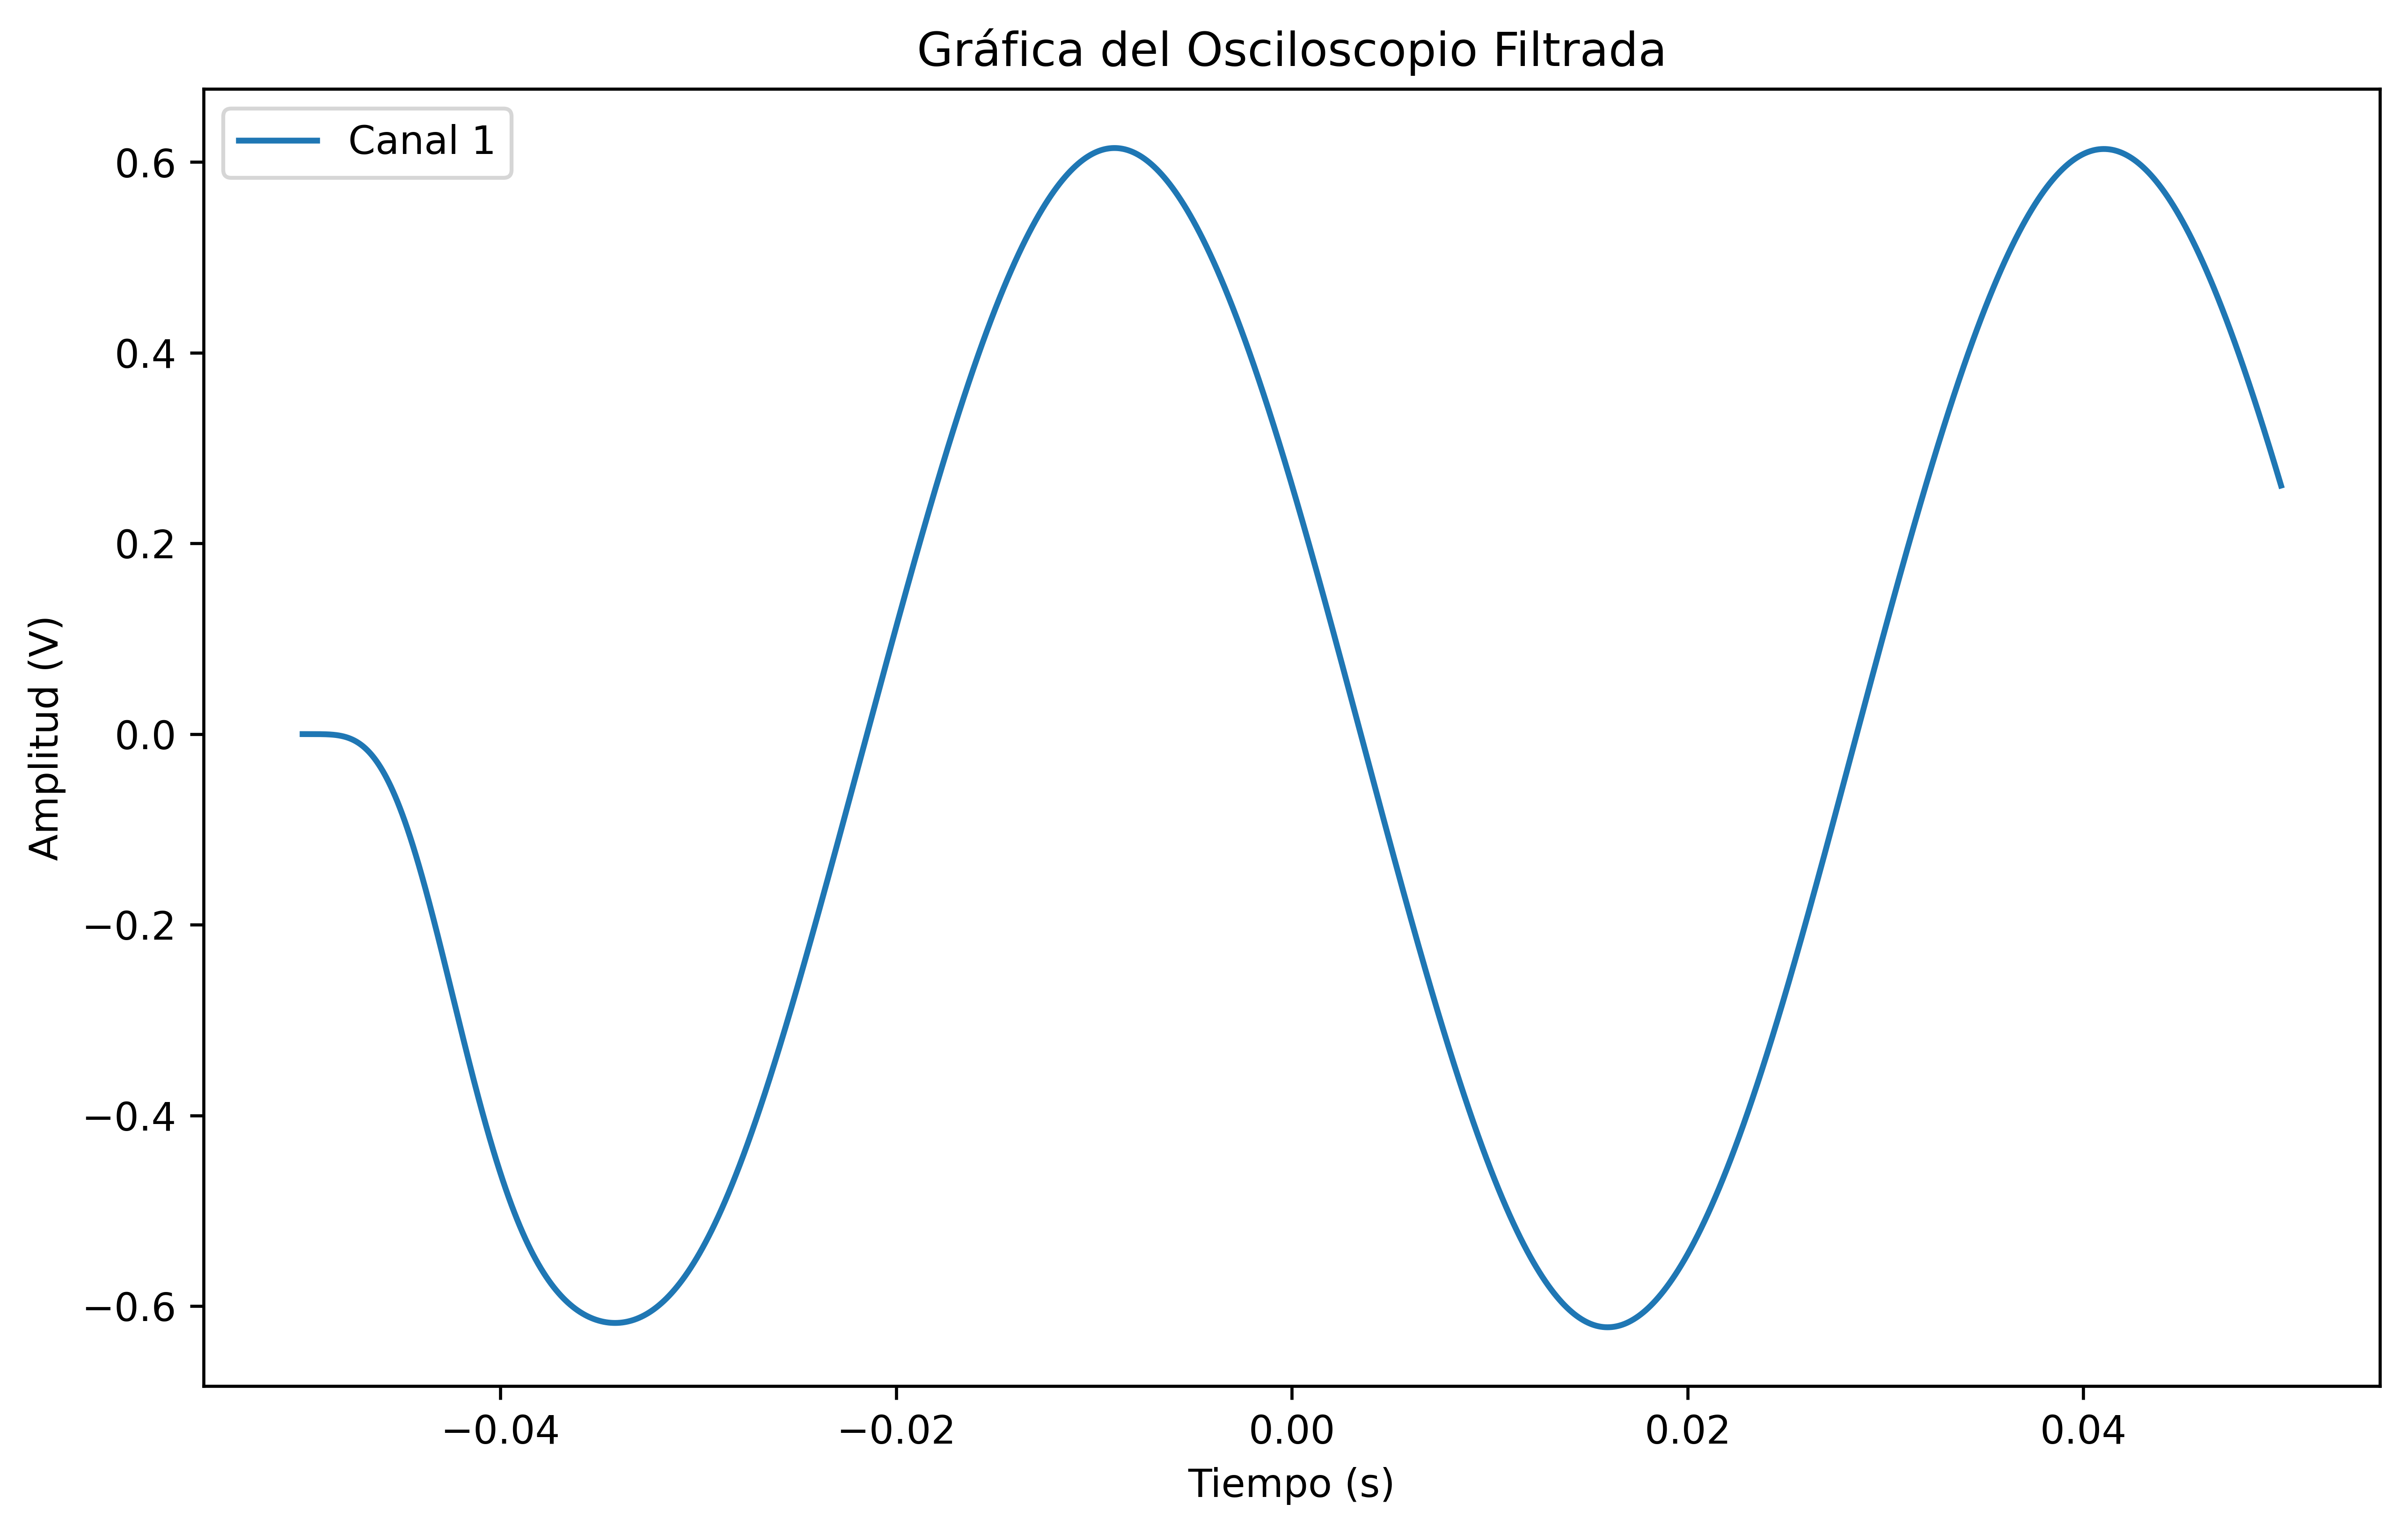

In [71]:
plt.figure(figsize=(10,6), dpi=600)
plt.plot(t1, filtrado)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Gráfica del Osciloscopio Filtrada")
plt.legend(("Canal 1",))
plt.show()

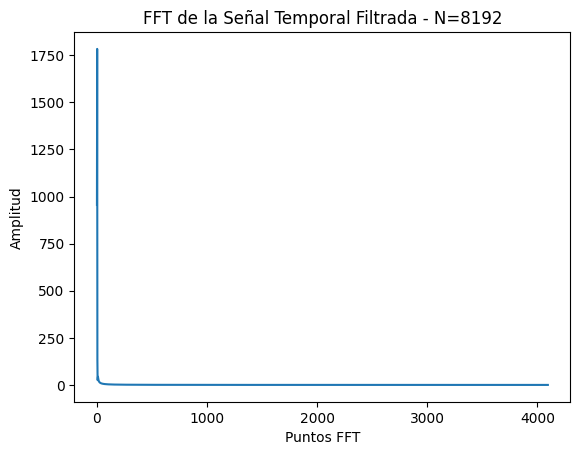

4096


In [73]:
N = 8192        # Puntos para la FFT
OFFSET = 0      # Para filtrar muy bajas frecuencias, en este caso quiero ver todo

signal_fft = fft(filtrado, n=N)     # Se calcula la FFT

plt.plot(abs(signal_fft[OFFSET:len(signal_fft)//2]))
plt.xlabel("Puntos FFT")
plt.ylabel("Amplitud")
plt.title("FFT de la Señal Temporal Filtrada - N={}".format(N))
plt.show()


print(len(signal_fft)//2)

Ahora... quedó únicamente (casi) la componente en 20 Hz.

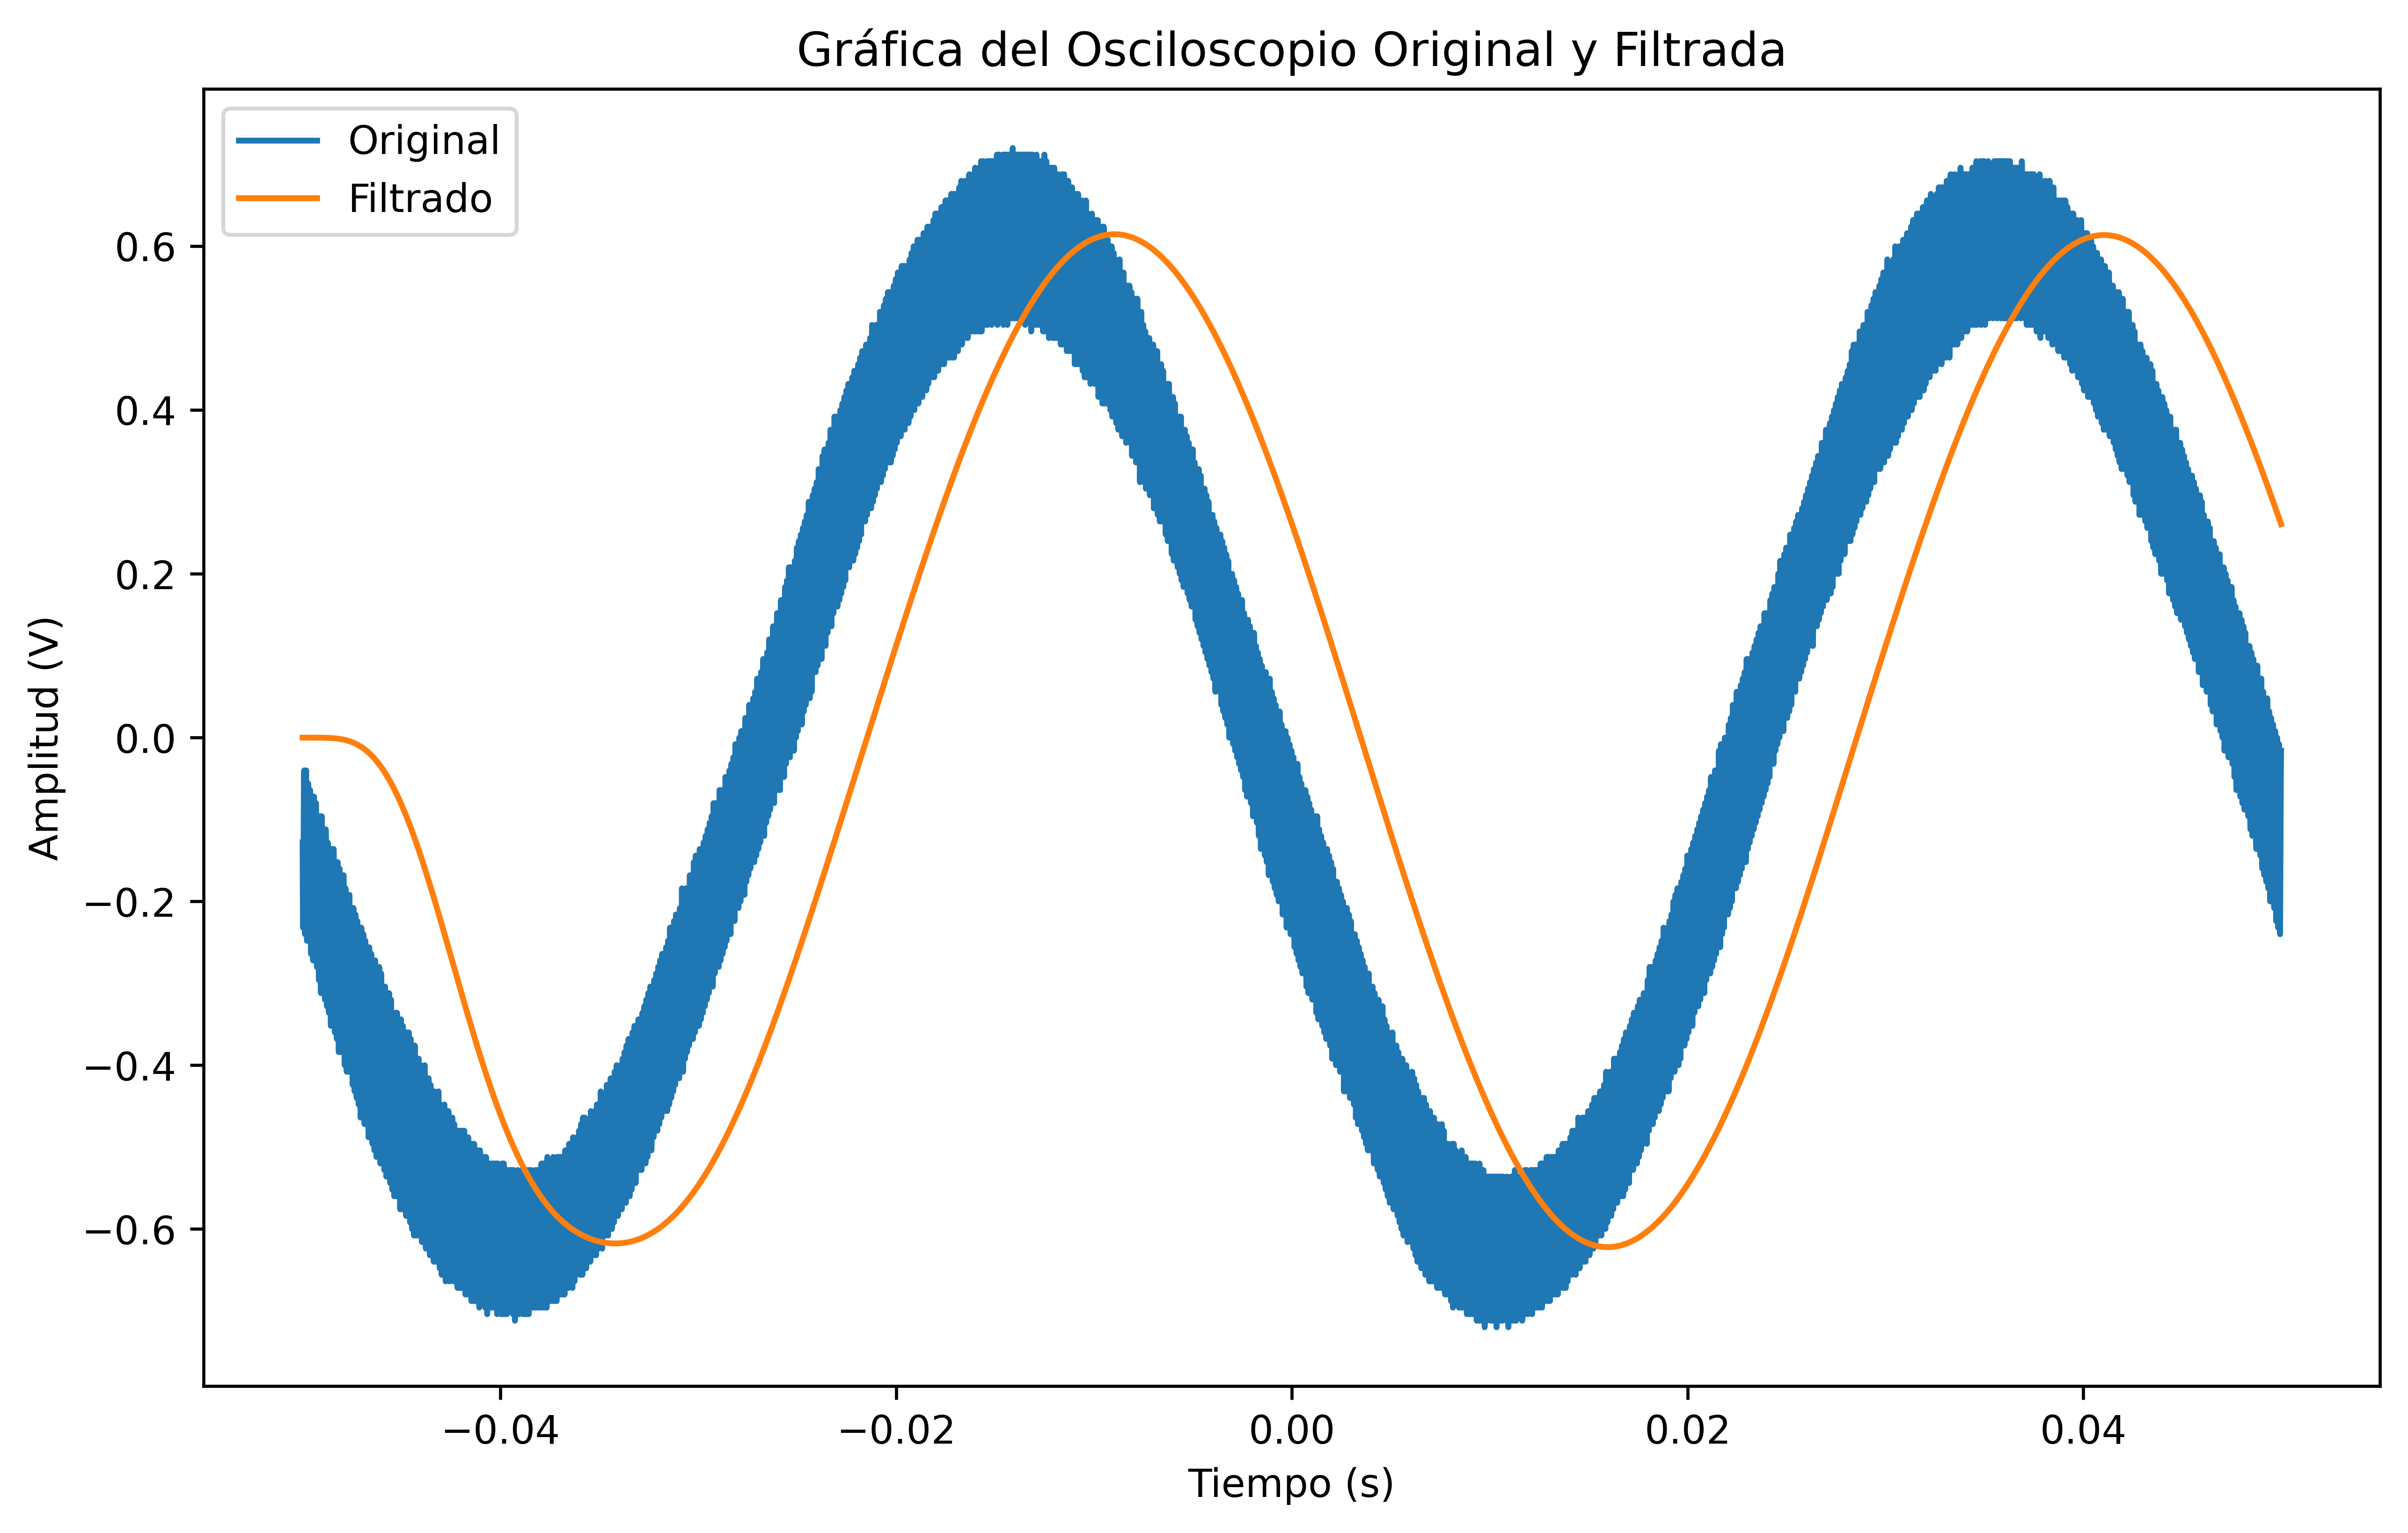

In [74]:
plt.figure(figsize=(10,6), dpi=600)
plt.plot(t1, d1, t1, filtrado)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Gráfica del Osciloscopio Original y Filtrada")
plt.legend(("Original", "Filtrado"))
plt.show()

"Se movió" todo a la derecha. Corrimiento en "fase", efecto del tipo de filtro usado.